In [48]:
%matplotlib inline
#%pylab inline

import pandas as pd
import re

data = pd.read_csv('titanic.csv', index_col='PassengerId')

data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [7]:
#!.number of males and females
gender_count = data['Sex'].value_counts()

print gender_count

f = open('answers/1', 'w')
f.write('%s %s' % (gender_count[0], gender_count[1]))
f.close()

male      577
female    314
Name: Sex, dtype: int64


In [8]:
#2. percent of survived

survived_number = data['Survived'].value_counts()
print survived_number

answer = survived_number[1] * 100.0 / (survived_number[0] + survived_number[1])
print answer

f = open('answers/2', 'w')
f.write('%.2f' % answer)
#f.write('62.29')
f.close()

0    549
1    342
Name: Survived, dtype: int64
38.3838383838


24.2424242424


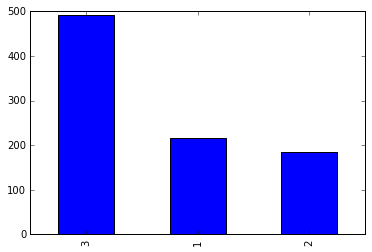

In [9]:
#3. Percent of 1-class passengers

data['Pclass'].value_counts().plot(kind='bar')

first_class = data[data['Pclass'] == 1]['Survived'].count()

all_count = data['Survived'].count()

result = first_class * 100.0 / all_count

print result

f = open('answers/3', 'w')
f.write('%.2f' % result)
f.close()

In [10]:
#4. Average and Median Age of passangers

median = data['Age'].median()

average = data.mean()['Age']

f = open('answers/4', 'w')
f.write('%.2f %s' % (average, median))
f.close()

In [11]:
#5 Pirson correlation between SibSp and Parch

data[['SibSp', 'Parch']]

answer = data['SibSp'].corr(data['Parch'])

print answer

f = open('answers/5', 'w')
f.write('%.2f' % answer)
f.close()


0.41483769862


In [16]:
#6 The most popular women name

womens = data[data['Sex'] == 'female']

women_names = womens['Name']
#print women_names.get(3)

for i in range(0, 891):
    name = women_names.get(i)
    if name != None:
        s = ""
        if "Mrs" in name:
            match = re.search('\\((.*)\\)', name)
            if match:
                s = match.group(1)
            else:
                match = re.search('Mrs\\.(.*)', name)
                s = match.group(1)
        else:
            match = re.search('\\.(.*)', name)
            s = match.group(1)
        
        s = s.strip()
        s = s.split()[0]
        women_names.set_value(i, s)
            
            
top = women_names.value_counts()

print top[:5]

f = open('answers/6', 'w')
f.write('Anna')
f.close()

 Fatima
 Gertrude Maybelle
 Florence "Fannie"
 Mara
Anna         15
Mary         14
Elizabeth    11
Margaret     10
Alice         7
Name: Name, dtype: int64


In [36]:
match = re.search('(abc)*', 'abcdabc')

In [43]:
match.groups(1)

('abc',)

In [42]:
match.group(0)

'abc'

In [39]:
match.group(1)

'abc'

1   2   2.1 3   4   5   6
577 314